In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


exec_time = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
png_output = f"clustered_bdid-{exec_time}"
george_csv = pd.read_csv("networkit_bdid-2023-11-07-18-06-39.csv")
clustered_csv = pd.read_csv("networkit_clustered_bdid-2023-11-07-18-06-39.csv")

In [2]:
joined_csv = george_csv.merge(clustered_csv, how='inner', on='fp_int_id')

In [3]:
joined_csv.head()

,fp_int_id,cp_level,cp_r_citing_zero,cp_r_citing_nonzero,tr_citing,cp_r_cited_zero,cp_r_cited_nonzero,tr_cited,cp_level_clustered,cp_r_citing_zero_clustered,cp_r_citing_nonzero_clustered,tr_citing_clustered,cp_r_cited_zero_clustered,cp_r_cited_nonzero_clustered,tr_cited_clustered
0,3,1,1,0,0,1,0,0,0,0,0,0,0,0,0
1,9,3,3,0,0,0,3,12,1,1,0,0,1,0,0
2,10,228,102,126,378,43,185,548,3,1,2,2,0,3,13
3,13,2,2,0,0,1,1,1,0,0,0,0,0,0,0
4,14,2,2,0,0,1,1,4,1,1,0,0,0,1,1


In [4]:
george_csv.head()

,fp_int_id,cp_level,cp_r_citing_zero,cp_r_citing_nonzero,tr_citing,cp_r_cited_zero,cp_r_cited_nonzero,tr_cited
0,0,36,6,30,121,7,29,64
1,1,1,1,0,0,1,0,0
2,2,8,6,2,2,8,0,0
3,3,1,1,0,0,1,0,0
4,4,19,7,12,27,14,5,5


In [5]:
clustered_csv.head()

,fp_int_id,cp_level_clustered,cp_r_citing_zero_clustered,cp_r_citing_nonzero_clustered,tr_citing_clustered,cp_r_cited_zero_clustered,cp_r_cited_nonzero_clustered,tr_cited_clustered
0,1078,16,2,14,73,0,16,304
1,18753,9,1,8,16,0,9,259
2,151199,12,3,9,20,0,12,357
3,201222,36,5,31,325,0,36,345
4,283859,23,2,21,99,0,23,400


In [6]:
cp_r_citing_ratio = joined_csv['cp_r_citing_nonzero_clustered'] / joined_csv['cp_r_citing_nonzero']
tr_citing_ratio = joined_csv['tr_citing_clustered'] / joined_csv['tr_citing']
tr_cited_ratio = joined_csv['tr_cited_clustered'] / joined_csv['tr_cited']
cp_r_cited_ratio = joined_csv['cp_r_cited_nonzero_clustered'] / joined_csv['cp_r_cited_nonzero']

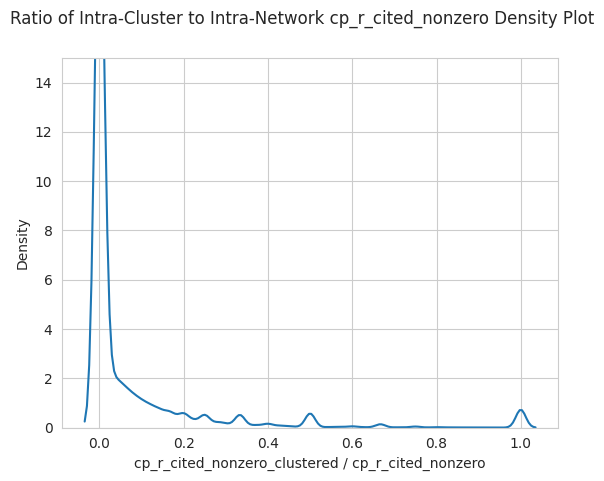

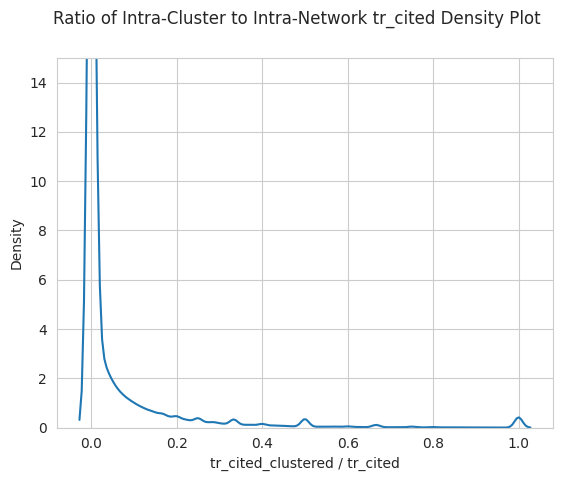

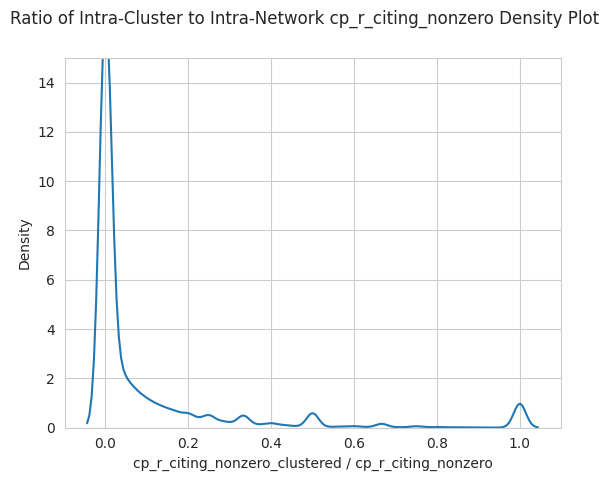

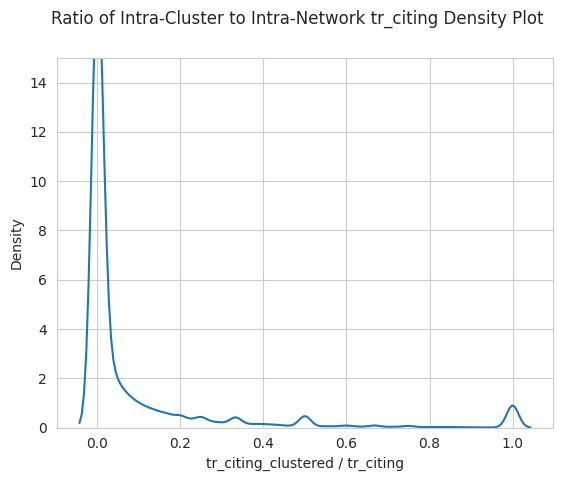

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(joined_csv['cp_level'], cp_r_citing_ratio)
ax.set_xscale('log')
plt.title('Ratio of Intra-Cluster to Intra-Network cp_r_citing_nonzero VS log(cp_level)')
plt.ylabel('cp_r_citing_nonzero_clustered / cp_r_citing_pub_nonzero')
plt.xlabel('log(cp_level)')
plt.savefig(f'{png_output}-0.png')
fig.clear()
ax = fig.add_subplot(1,1,1)
ax.scatter(joined_csv['cp_level'], tr_citing_ratio)
ax.set_xscale('log')
plt.title('Ratio of Intra-Cluster to Intra-Network tr_citing VS log(cp_level)')
plt.ylabel('tr_citing_clustered / tr_citing')
plt.xlabel('log(cp_level)')
plt.savefig(f'{png_output}-1.png')
fig.clear()
ax = fig.add_subplot(1,1,1)
ax.scatter(joined_csv['cp_level'], tr_cited_ratio)
ax.set_xscale('log')
plt.title('Ratio of Intra-Cluster to Intra-Network tr_cited VS log(cp_level)')
plt.ylabel('tr_cited_clustered / tr_cited')
plt.xlabel('log(cp_level)')
plt.savefig(f'{png_output}-2.png')
fig.clear()
ax = fig.add_subplot(1,1,1)
ax.scatter(joined_csv['cp_level'], cp_r_cited_ratio)
ax.set_xscale('log')
plt.title('Ratio of Intra-Cluster to Intra-Network cp_r_cited_nonzero VS log(cp_level)')
plt.ylabel('cp_r_cited_nonzero_clustered / cp_r_cited_nonzero')
plt.xlabel('log(cp_level)')
plt.savefig(f'{png_output}-3.png')
fig.clear()

# Density plots (For some reason plotting them all sequentially doesn't work, Maybe I have to clear?)
sns.set_style('whitegrid')
svm = sns.kdeplot(cp_r_cited_ratio)
fig = svm.get_figure()
plt.ylim(0, 15)
plt.xlabel('cp_r_cited_nonzero_clustered / cp_r_cited_nonzero')
fig.suptitle('Ratio of Intra-Cluster to Intra-Network cp_r_cited_nonzero Density Plot')
fig.savefig(f'{png_output}-4.png', dpi=400)
plt.figure()
svm = sns.kdeplot(tr_cited_ratio)
fig = svm.get_figure()
plt.ylim(0, 15)
plt.xlabel('tr_cited_clustered / tr_cited')
fig.suptitle('Ratio of Intra-Cluster to Intra-Network tr_cited Density Plot')
fig.savefig(f'{png_output}-5.png', dpi=400)
plt.figure()
svm = sns.kdeplot(cp_r_citing_ratio)
fig = svm.get_figure()
plt.ylim(0, 15)
plt.xlabel('cp_r_citing_nonzero_clustered / cp_r_citing_nonzero')
fig.suptitle('Ratio of Intra-Cluster to Intra-Network cp_r_citing_nonzero Density Plot')
fig.savefig(f'{png_output}-6.png', dpi=400)
plt.figure()
svm = sns.kdeplot(tr_citing_ratio)
fig = svm.get_figure()
plt.ylim(0, 15)
plt.xlabel('tr_citing_clustered / tr_citing')
fig.suptitle('Ratio of Intra-Cluster to Intra-Network tr_citing Density Plot')
fig.savefig(f'{png_output}-7.png', dpi=400)